# Neural Network Image Classifier using TensorFlow 1

In this notbook, we  build neural networks image classifier using TensorFlow 1. We will do the following 

- Initialize variables
- Start your own session
- Train algorithms 
- Implement a Neural Network

All functions are defined in the python file

- my_tf_utils.py

And we will import them together with other librairies in the following. 

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

import my_tf_utils as my

%matplotlib inline
np.random.seed(1)
print("TensorFlow version have to be  TF 1.x")
tf.__version__

TensorFlow version have to be  TF 1.x


'1.15.0'

In [2]:
# EXAMPLE 
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

#tf.disable_v2_behavior()
#tf.compat.v1.disable_eager_execution()
#init = tf.compat.v1.global_variables_initializer()

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed

#with tf.compat.v1.Session() as session:   # Added .compat.v1
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))   

9


In [3]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


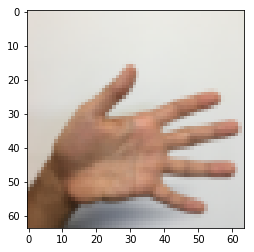

In [4]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [5]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [6]:
tf.reset_default_graph()
with tf.Session() as sess:          
    parameters = my.initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [7]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = my.create_placeholders(12288, 6)
    parameters = my.initialize_parameters()
    Z3 = my.forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))


Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [8]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = my.create_placeholders(12288, 6)
    parameters = my.initialize_parameters()
    Z3 = my.forward_propagation(X, parameters)
    cost = my.compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)



Cost after epoch 0: 1.913693
Cost after epoch 100: 1.049044
Cost after epoch 200: 0.756096
Cost after epoch 300: 0.590979
Cost after epoch 400: 0.483216
Cost after epoch 500: 0.393141
Cost after epoch 600: 0.323626
Cost after epoch 700: 0.261628
Cost after epoch 800: 0.210261
Cost after epoch 900: 0.171656
Cost after epoch 1000: 0.151205
Cost after epoch 1100: 0.110646
Cost after epoch 1200: 0.089255
Cost after epoch 1300: 0.061218
Cost after epoch 1400: 0.053902


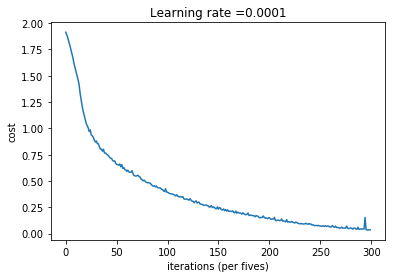

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [9]:
# Train the model
parameters = my.model(X_train, Y_train, X_test, Y_test)